# 스펨 메일 처리

---

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:

# 데이터 로드
url = 'https://raw.githubusercontent.com/YeeeeeHo/ML_Final/refs/heads/main/example/classification/sms_spam.csv'
data = pd.read_csv(url, header=None, names=['label', 'message'])

# 데이터 전처리
data = data.dropna()  # 결측값 제거
data = data[data['label'].isin(['ham', 'spam'])]  # 유효한 값만 남기기
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # 라벨 인코딩

# 텍스트 데이터 벡터화
X = data['message']
y = data['label']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
# 모델 학습 및 예측
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.9850567842199641
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1447
           1       0.93      0.96      0.95       226

    accuracy                           0.99      1673
   macro avg       0.96      0.97      0.97      1673
weighted avg       0.99      0.99      0.99      1673



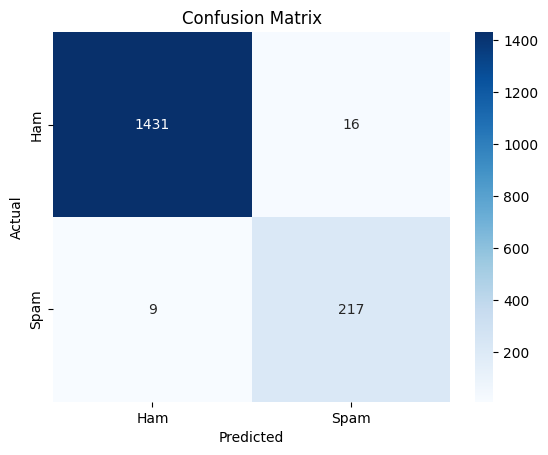

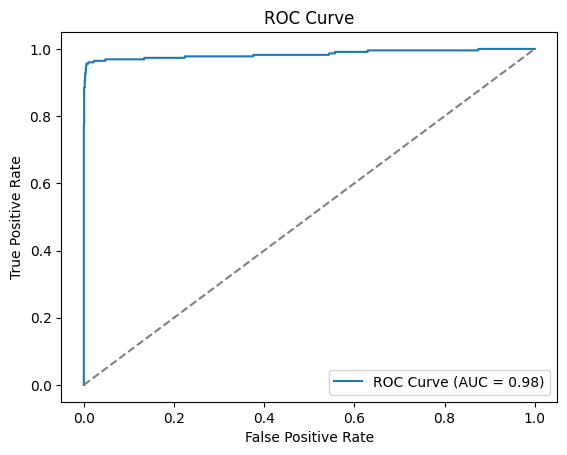

In [35]:

# 평가 결과
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve 시각화
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

---

# 뉴스 기사 분류

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [7]:

# 데이터 로드
file_path = 'https://raw.githubusercontent.com/YeeeeeHo/ML_Final/refs/heads/main/example/classification/news.csv'  # 파일 경로를 지정하세요
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())


   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [8]:

# 데이터 전처리
data = data.dropna()  # 결측값 제거
X = data['text']  # 기사 본문
y = data['label'].map({'FAKE': 0, 'REAL': 1})  # 라벨 인코딩 ('FAKE' -> 0, 'REAL' -> 1)

# 텍스트 데이터 벡터화
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:

# 모델 학습 및 예측
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.8842714360862703
              precision    recall  f1-score   support

        FAKE       0.92      0.85      0.88       968
        REAL       0.86      0.92      0.89       933

    accuracy                           0.88      1901
   macro avg       0.89      0.88      0.88      1901
weighted avg       0.89      0.88      0.88      1901



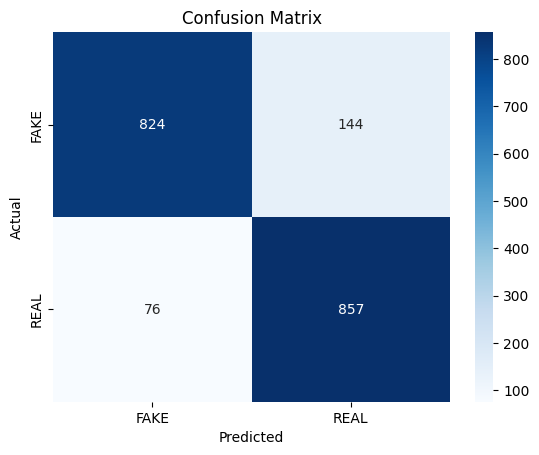

In [10]:

# 평가 결과
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

---

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
url = 'https://raw.githubusercontent.com/YeeeeeHo/ML_Final/main/example/classification/movie_reviews.csv'
data = pd.read_csv(url)

# 데이터 전처리
data = data.dropna()  # 결측값 제거
X = data['review']
y = data['sentiment'].map({'positive': 1, 'negative': 0})  # 라벨 인코딩

# 텍스트 데이터 벡터화
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습 및 예측
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test
